#      <center> COVID-19 Data Analysis and Forecasting: Algeria and the World </center>

### <center> Sami Belkacem, PhD Student in Artificial Intelligence, USTHB University </center>

# 1- Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 2- Read CSV file to a dataframe

In [2]:
df = pd.read_csv(r"C:\Users\Sam\Desktop\Data.csv")

# 3- Preview the dataframe

In [3]:
df = df.round(3)
df

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests per thousand people,Cases,Deaths
0,Algeria,Africa,28.03,1.66,25,1.9,1.83,4044.30,41318142,29,6,2019-12-31,NaN,0.0,0.0
1,Algeria,Africa,28.03,1.66,25,1.9,1.83,4044.30,41318142,29,6,2020-01-01,NaN,0.0,0.0
2,Algeria,Africa,28.03,1.66,25,1.9,1.83,4044.30,41318142,29,6,2020-01-02,NaN,0.0,0.0
3,Algeria,Africa,28.03,1.66,25,1.9,1.83,4044.30,41318142,29,6,2020-01-03,NaN,0.0,0.0
4,Algeria,Africa,28.03,1.66,25,1.9,1.83,4044.30,41318142,29,6,2020-01-04,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18127,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-13,0.102,4893.0,122.0
18128,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-14,NaN,4990.0,128.0
18129,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-15,NaN,5072.0,128.0
18130,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-16,NaN,5176.0,130.0


# 4- Fill missing values in columns

In [4]:
df.isnull().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests per thousand people    5228
Cases                               214
Deaths                              214
dtype: int64

In [5]:
df = df.groupby('Entity').apply(lambda x: x.fillna(method='ffill'))
df = df.groupby('Entity').apply(lambda x: x.fillna(method='bfill'))
df = df[df.Cases > 0]

# 5- Statistical description of the data

In [6]:
df.describe().round(2)

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests per thousand people,Cases,Deaths
count,15806.00,15806.00,15806.00,15806.00,15806.00,15806.00,1.580600e+04,15806.00,15806.00,15806.00,15806.00,15806.00
mean,26.05,22.66,16.67,3.43,2.35,27814.71,5.988031e+07,34.66,11.95,0.56,72690.79,3515.86
std,26.60,62.22,8.85,2.72,1.51,21927.59,1.570959e+08,8.24,6.95,0.96,310197.50,13116.74
min,-40.90,-106.35,-14.00,0.30,0.02,1429.81,3.412840e+05,16.00,1.00,0.00,1.00,0.00
25%,9.08,-3.44,9.00,1.50,1.03,8827.01,5.769603e+06,29.00,6.00,0.06,647.00,7.00
50%,31.05,19.70,17.00,2.54,2.37,24574.38,1.713285e+07,35.00,12.00,0.26,5371.50,107.00
75%,47.52,53.69,25.00,4.69,3.48,39753.24,5.337061e+07,42.00,19.00,0.68,34998.25,929.75
max,64.96,179.41,29.00,13.05,7.52,116935.60,1.339180e+09,48.00,28.00,15.82,5403269.00,170052.00


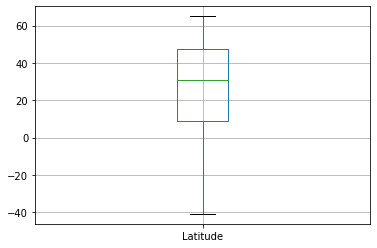

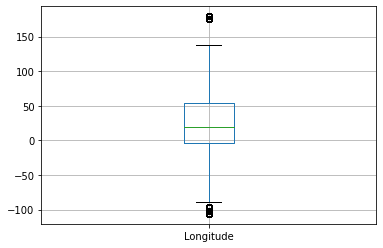

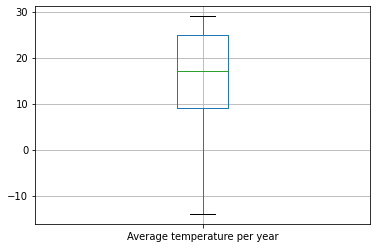

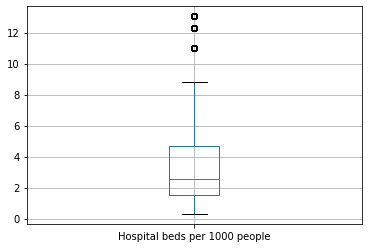

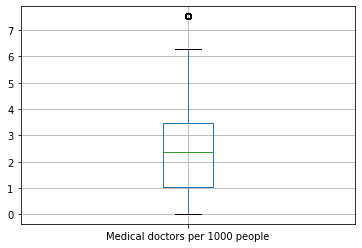

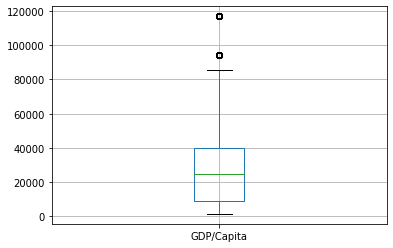

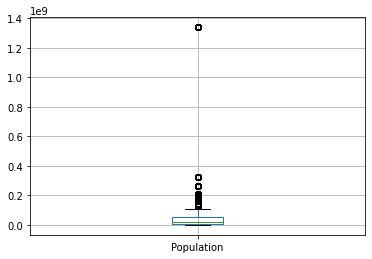

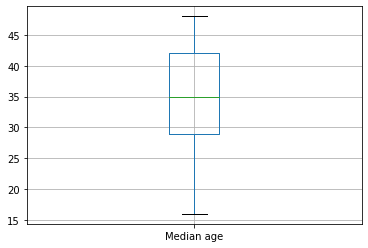

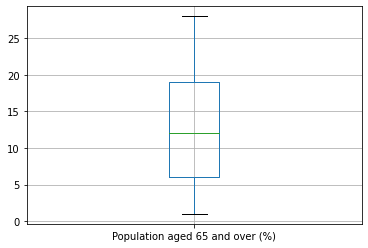

In [7]:
for column in df.drop(['Entity', 'Continent', 'Date', 'Daily tests per thousand people', 'Cases', 'Deaths'], axis=1):
    plt.figure()
    df.boxplot([column])

# 6- Visualize the data

## Feature distribution with histograms

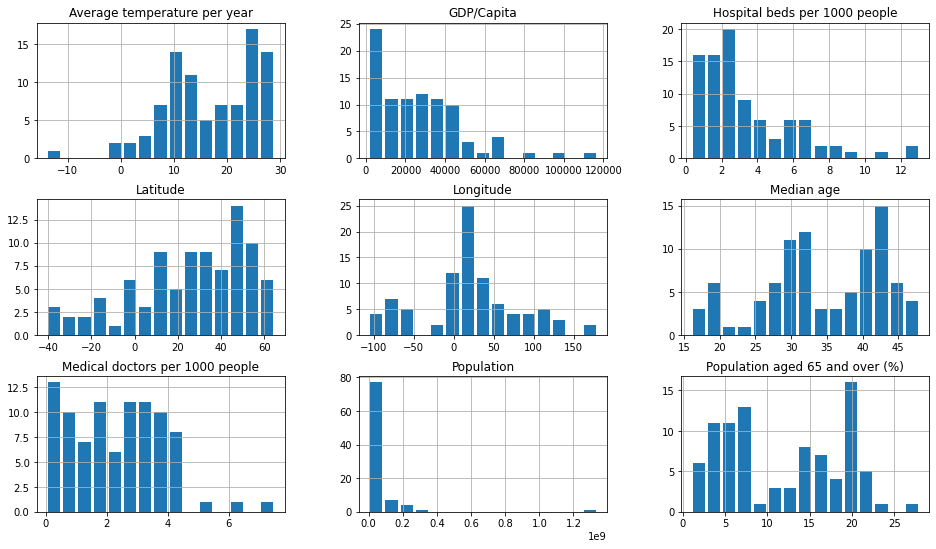

In [8]:
columns = ['Date', 'Daily tests per thousand people', 'Cases', 'Deaths']
df.drop(columns, axis=1).drop_duplicates().hist(bins=15, figsize=(16, 9), rwidth=0.8)
plt.show()

## Feature correlation with a heatmap: Last cases and deaths to date

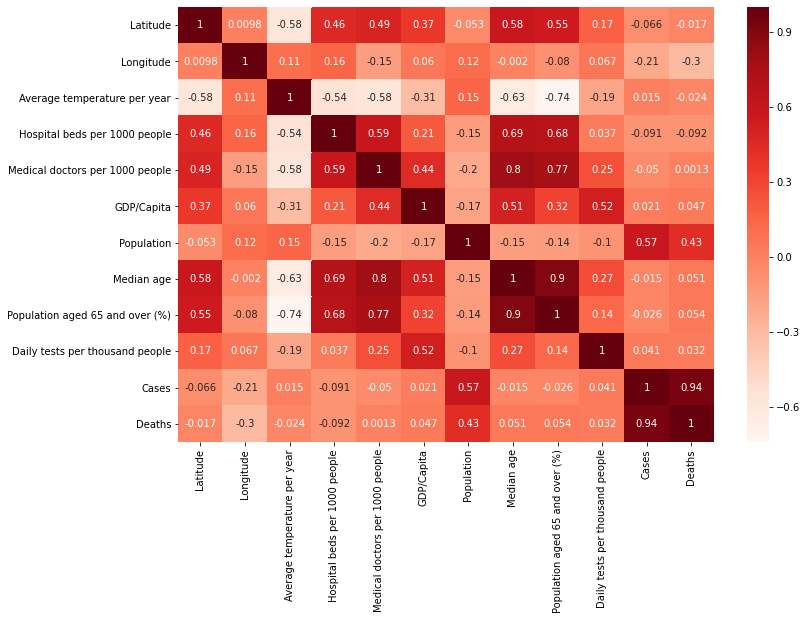

In [9]:
# Keep the last line (date) for each country and drop unused columns
df_last = df.groupby('Entity').tail(1).drop(['Entity', 'Date'], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_last.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

## Output variable curves with line plots

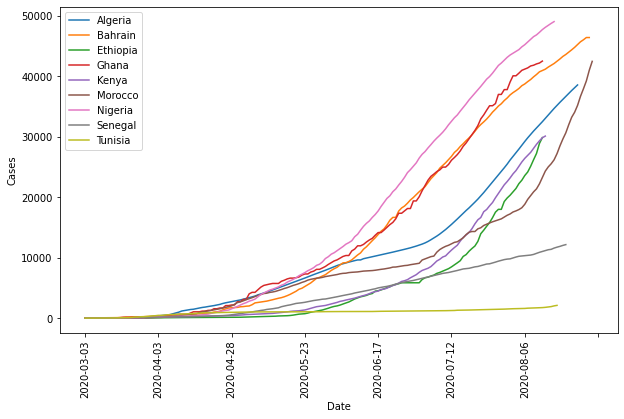

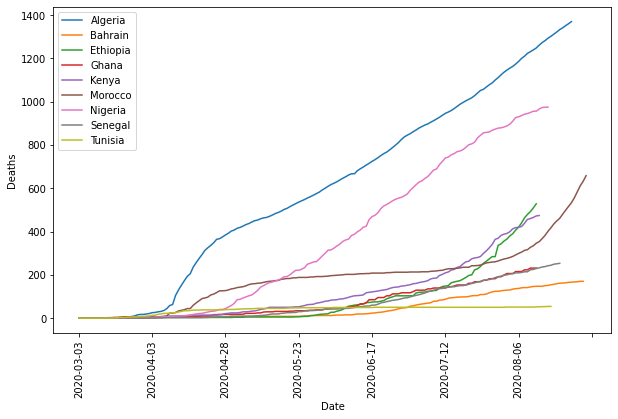

In [10]:
# Target countries and target dates
countries = ['Algeria', 'Bahrain', 'Ethiopia', 'Ghana', 'Kenya', 'Morocco', 'Nigeria', 'Senegal', 'Tunisia']
df_temp = df.loc[df['Date'] > '2020-02-25']

# Plot case and death curves
for output_variable in ['Cases', 'Deaths']:
    fig, ax = plt.subplots(figsize=(10, 6))
    for key, grp in df_temp[df_temp['Entity'].isin(countries)].groupby(['Entity']):
        ax = grp.plot(ax=ax, kind='line', x='Date', y=output_variable, label=key)
    plt.legend(loc='best')
    plt.xticks(rotation=90)
    plt.ylabel(output_variable)
    plt.show()

## Feature-Output-variable distributions with scatter plots: Last cases and deaths to date

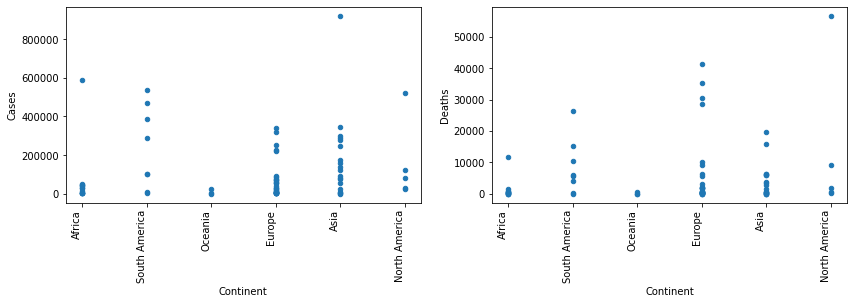

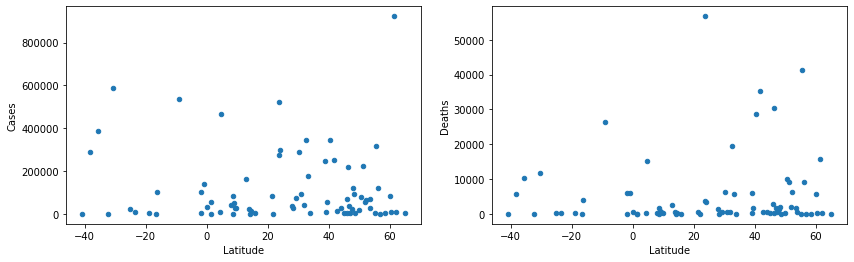

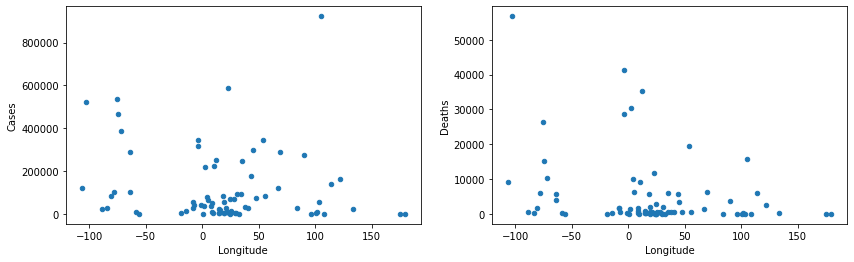

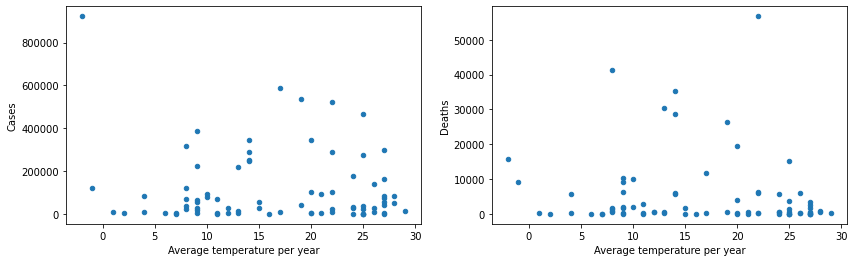

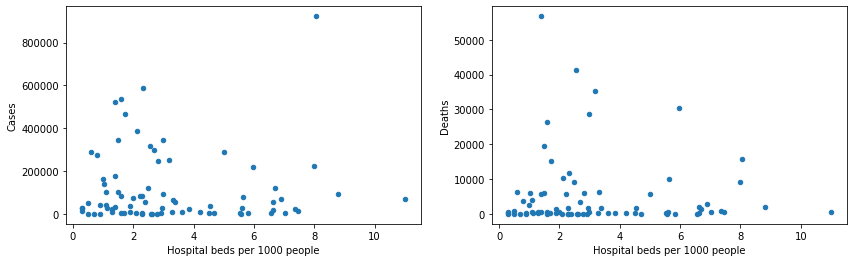

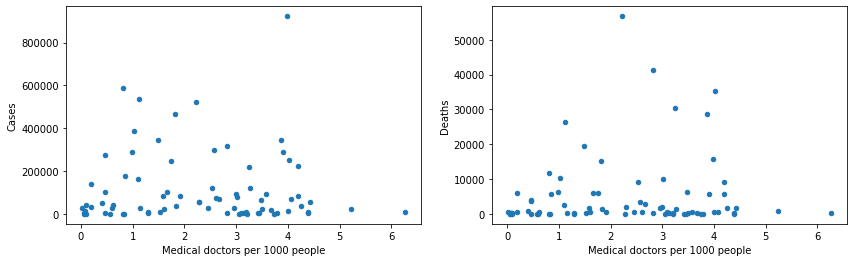

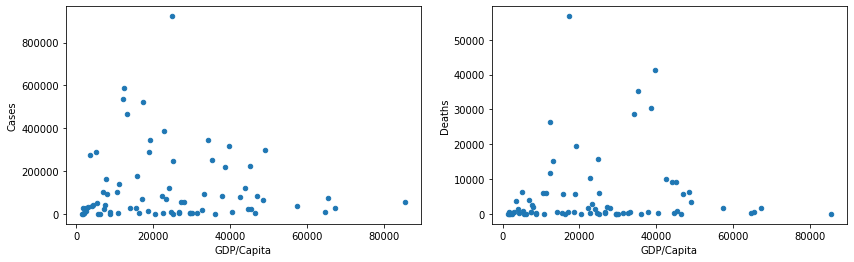

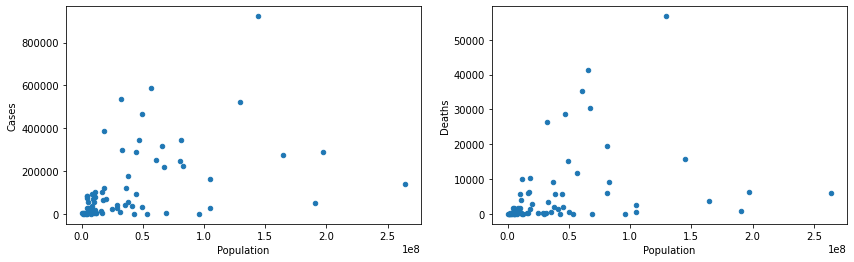

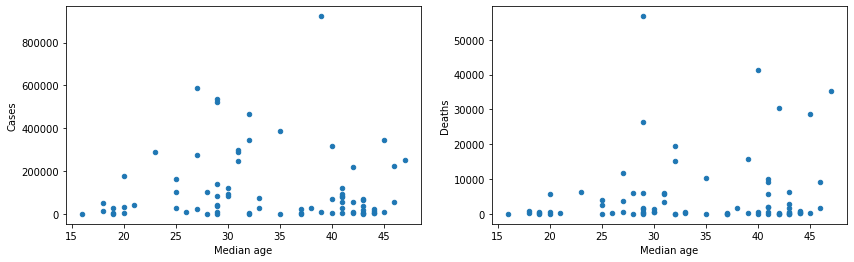

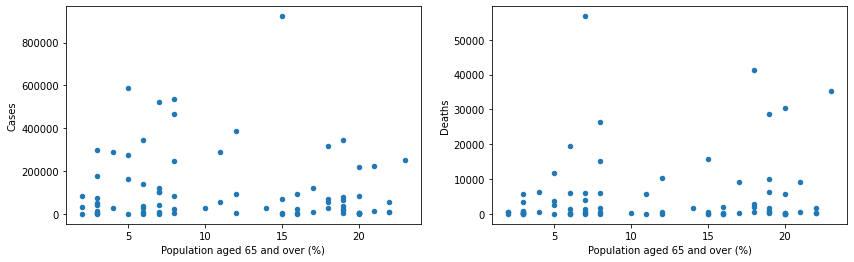

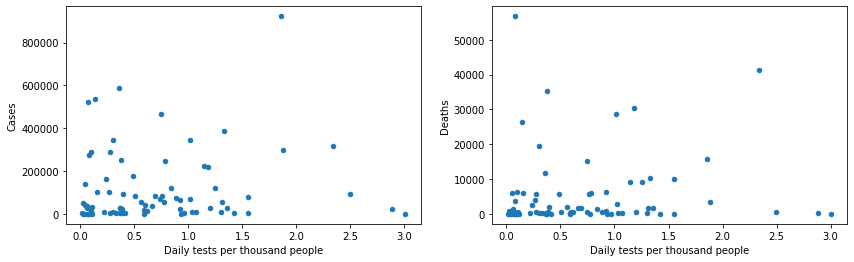

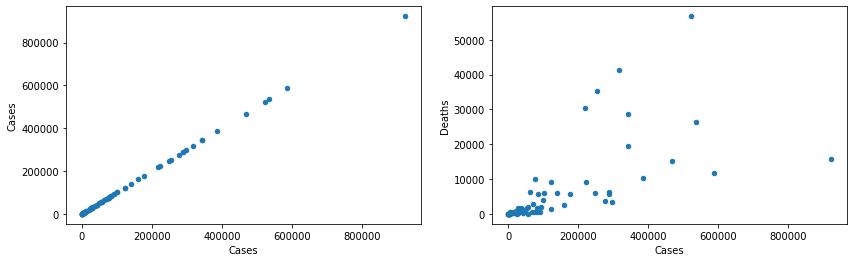

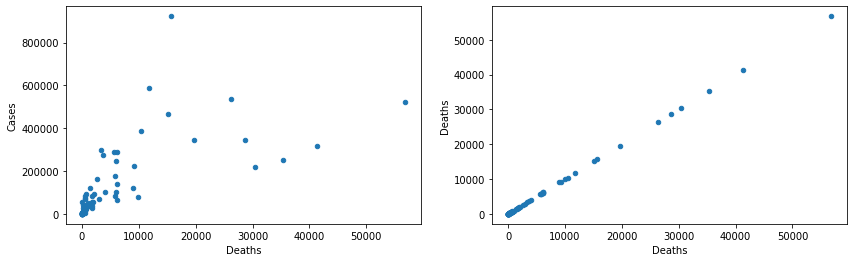

In [11]:
# Scatter plots readability: remove outliers in all comuns except in the column 'Continent'
column_continent = df_last[['Continent']]
df_last = df_last.drop('Continent', axis=1)
df_last = column_continent.join(df_last[(np.abs(zscore(df_last)) < 3).all(axis=1)])

# Plot feature-output-variable distributions for each column
for column in df_last.columns:
    fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
    df_last.plot.scatter(x=column, y='Cases', ax=ax[0])
    df_last.plot.scatter(x=column, y='Deaths', ax=ax[1])
    if column == 'Continent':
        fig.autofmt_xdate(rotation=90)